In [2]:
!pip install statsmodels==0.13.1
!pip install numpy
!pip install pandas
!pip install statsmodels.tsa.ar_model
!pip install matplotlib.pyplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 13.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
ERROR: Could not find a version that satisfies the requirement statsmodels.tsa.ar_model (from versions: none)
ERROR: No matching distribution found for statsmodels.tsa.ar_model
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


СКАЧИВАНИЕ И ИМПОРТИРОВАНИЕ НЕОБХОДИМЫХ БИБЛИОТЕК

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Подключаем гугл диск для работы с файлами на нем
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


СМОТР ДАННЫХ

In [7]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(20,10)})

In [8]:
train = pd.read_excel('gdrive/MyDrive/train.xlsx')
train

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


In [10]:
train.describe()

,dt,Цена на арматуру
count,400,400.000000
mean,2018-11-01 12:00:00,39229.475000
min,2015-01-05 00:00:00,21000.000000
25%,2016-12-03 06:00:00,31075.000000
50%,2018-11-01 12:00:00,35450.000000
75%,2020-09-29 18:00:00,42000.000000
max,2022-08-29 00:00:00,79000.000000
std,NaN,13407.979668


In [11]:
train.fillna(method='bfill', inplace=True)
train

<ipython-input-11-dc3f6ebbfab1>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.fillna(method='bfill', inplace=True)


,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [12]:
train.replace(np.nan, 0, inplace=True)
train

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [13]:
train = train.set_index(['dt'])

ПОСТРОЕНИЕ ГРАФИКА ВРЕМЕННОГО РЯДА

<Axes: title={'center': 'Time series'}, xlabel='dt', ylabel='Цена на арматуру'>

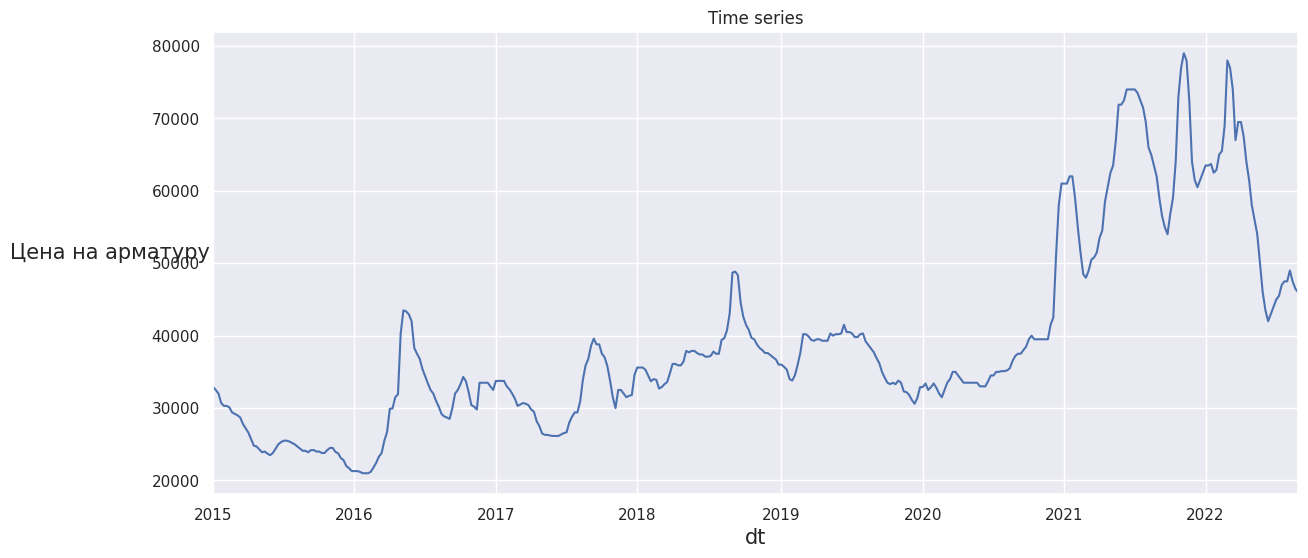

In [14]:
import matplotlib.pyplot as plt
# Рассмотрим изменение цены
plt.figure(figsize=(14, 6))
plt.title('Time series')
plt.xlabel('dt', fontsize=15)
plt.ylabel('Цена на арматуру', rotation=0, labelpad=30, fontsize=15)
train['Цена на арматуру'].plot()

<Axes: title={'center': 'Residual'}, xlabel='dt'>

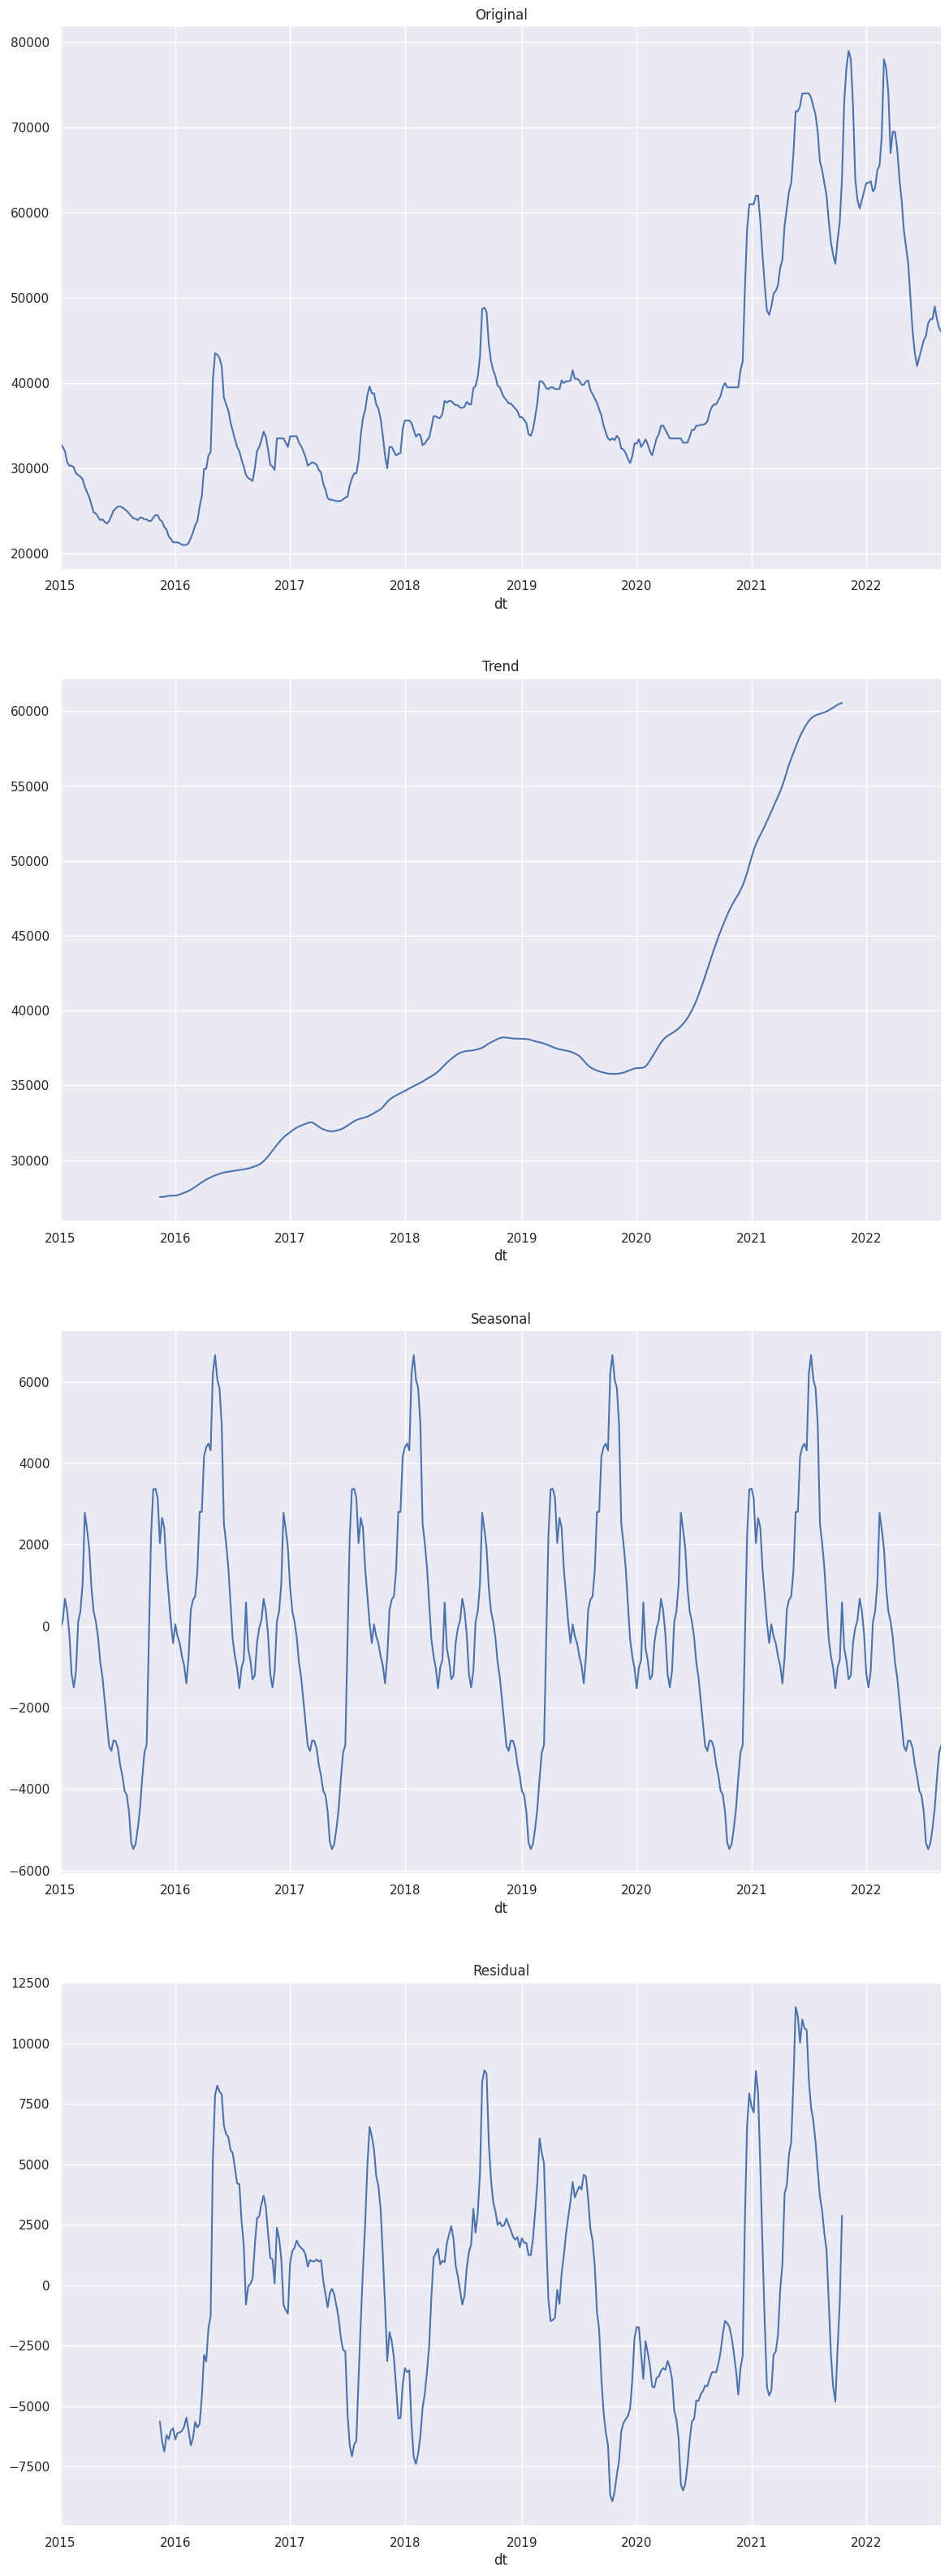

In [15]:
# Разложим ряд на компоненты и ответим: Есть ли у данного ряда тренд? Есть ли у данного ряда сезонность?
from statsmodels.tsa.seasonal import seasonal_decompose
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(train[['Цена на арматуру']], period=90)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3])

In [17]:
train = pd.read_excel('gdrive/MyDrive/train.xlsx')

# Сортировка значений (дата)
train = train.sort_values('dt').reset_index(drop=True)


ПОСТРОЕНИЕ МОДЕЛИ: ARIMA

            Цена на арматуру
dt                          
2015-01-05             32900
2015-01-12             32500
2015-01-19             32000
2015-01-26             30700
2015-02-02             30300


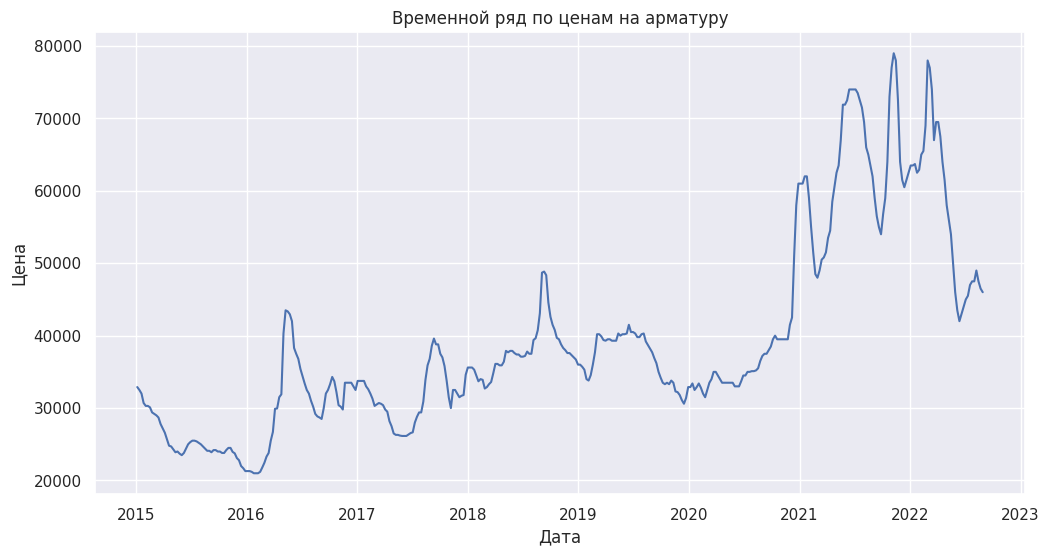

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


Среднеквадратичная ошибка (MSE): 214637657.073245


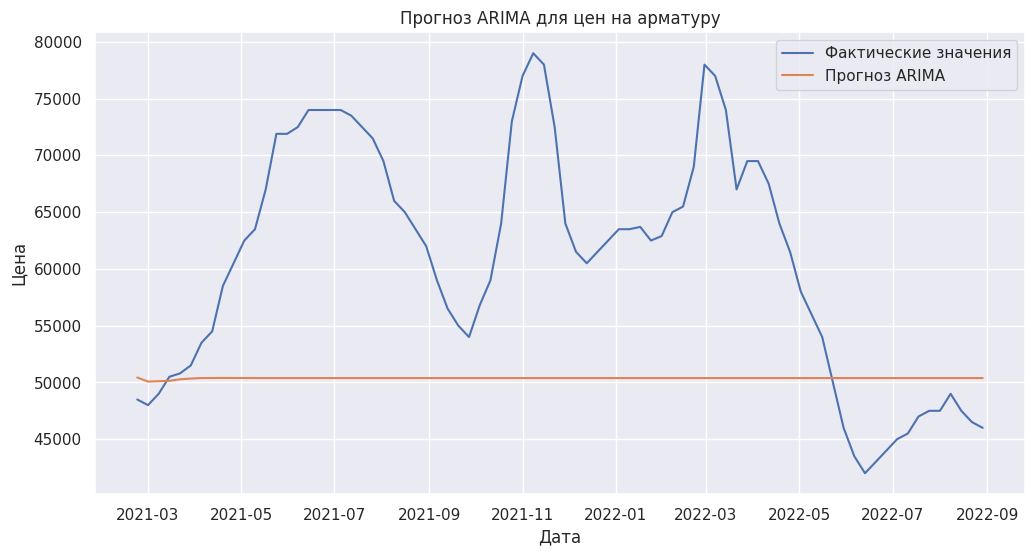

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 1. Загрузка данных из файла
file_path = 'gdrive/MyDrive/train.xlsx'  # Укажите путь к вашему файлу
data = pd.read_excel(file_path)

# 2. Подготовка данных
# Преобразуем столбец 'dt' в формат datetime
data['dt'] = pd.to_datetime(data['dt'])

# Устанавливаем 'dt' в качестве индекса
data.set_index('dt', inplace=True)

# Проверяем данные
print(data.head())

# График временного ряда
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Цена на арматуру'])
plt.title('Временной ряд по ценам на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()

# 3. Разделение данных на обучающую и тестовую выборки
train_size = int(len(data) * 0.8)  # 80% данных для обучения
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# 4. Построение модели ARIMA
# Порядок (p, d, q) можно подобрать с помощью ACF и PACF или автоматического подбора
model = ARIMA(train_data['Цена на арматуру'], order=(5, 1, 0))  # Пример параметров
model_fit = model.fit()

# 5. Прогнозирование
forecast = model_fit.forecast(steps=len(test_data))

# 6. Оценка модели
mse = mean_squared_error(test_data['Цена на арматуру'], forecast)
print(f'Среднеквадратичная ошибка (MSE): {mse}')

# 7. Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Цена на арматуру'], label='Фактические значения')
plt.plot(test_data.index, forecast, label='Прогноз ARIMA')
plt.title('Прогноз ARIMA для цен на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

ПРОБА ИНОЙ МОДЕЛИ: SARIMA

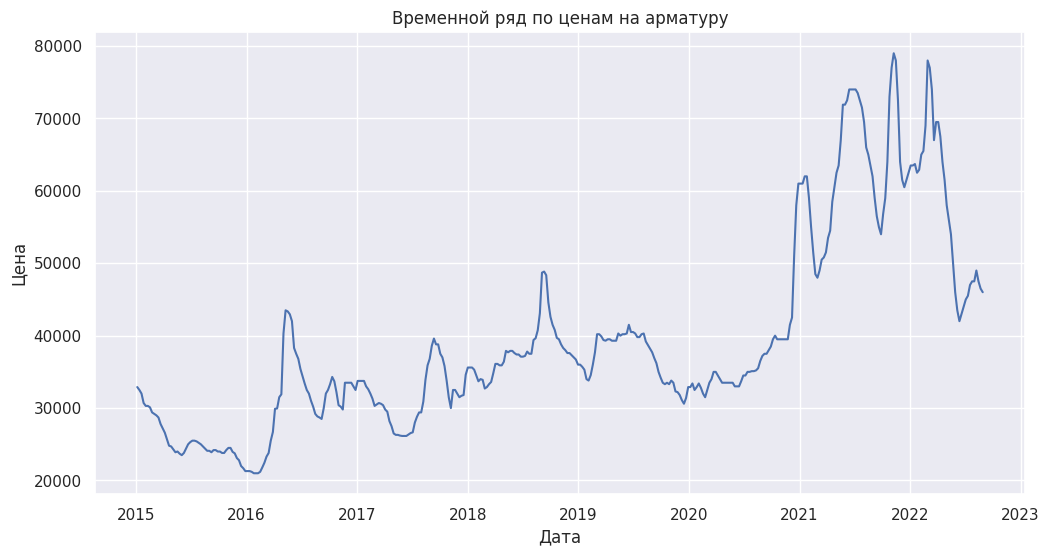

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


Среднеквадратичная ошибка (MSE): 162589499.56132752


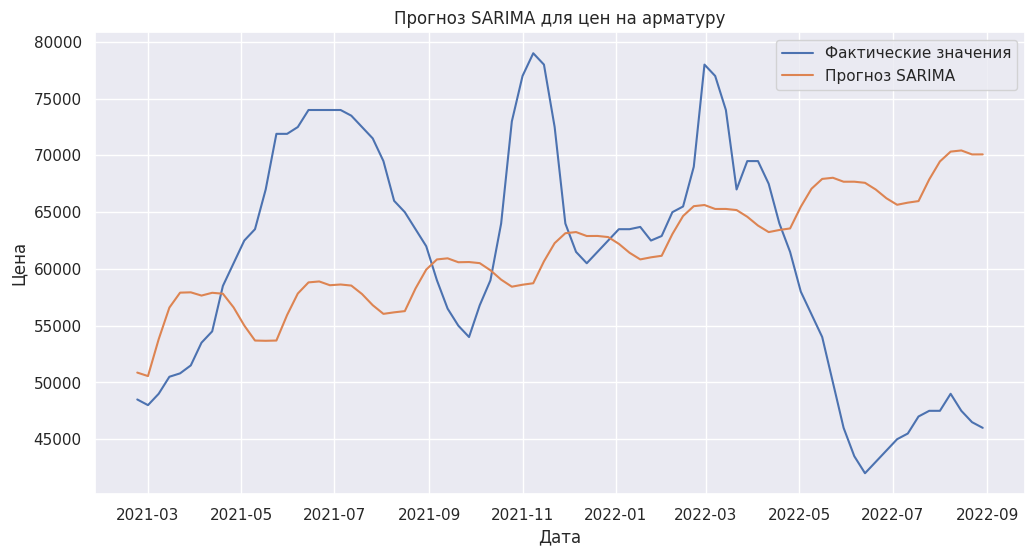

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Загрузка данных из файла
data = pd.read_excel('gdrive/MyDrive/train.xlsx')
data = pd.read_excel(file_path)

# Преобразование столбца с датой в формат datetime
data['dt'] = pd.to_datetime(data['dt'])

# Установка даты в качестве индекса
data.set_index('dt', inplace=True)

# График цен
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Цена на арматуру'])
plt.title('Временной ряд по ценам на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Построение модели SARIMA
# Порядок (p, d, q) для несезонной части и (P, D, Q, S) для сезонной части
model = SARIMAX(train_data['Цена на арматуру'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Прогнозирование
forecast = model_fit.forecast(steps=len(test_data))

# Оценка модели
mse = mean_squared_error(test_data['Цена на арматуру'], forecast)
print(f'Среднеквадратичная ошибка (MSE): {mse}')

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Цена на арматуру'], label='Фактические значения')
plt.plot(test_data.index, forecast, label='Прогноз SARIMA')
plt.title('Прогноз SARIMA для цен на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()